## Chapter 4: POS tagging
https://nlp100.github.io/en/ch04.html

### 30. Reading the result
Implement a program that reads the result of part-of-speech tagging. Here, represent a sentence as a list of mapping objects, each of which associates a surface form, lemma (base form), part-of-speech tag with the keys text, lemma, pos. Use this representation in the rest of the problems.

In [23]:
import itertools

def read_text(flat=False):
    with open('alice/alice.txt.conll') as file:
        res = []
        sent = []

        for line in file:
            if line != '\n':
                lst = line.split('\t')
                sent.append({
                    'text': lst[1],
                    'lemma': lst[2],
                    'pos': lst[3],
                })
            else:
                res.append(sent)
                sent = []
        if flat:
            return list(itertools.chain.from_iterable(res))
        else:
            return res

read_text()[:3]

[[{'text': 'ALICE', 'lemma': 'ALICE', 'pos': 'NNP'},
  {'text': "'S", 'lemma': "'s", 'pos': 'POS'},
  {'text': 'ADVENTURES', 'lemma': 'ADVENTURES', 'pos': 'NNP'},
  {'text': 'IN', 'lemma': 'in', 'pos': 'IN'},
  {'text': 'WONDERLAND', 'lemma': 'WONDERLAND', 'pos': 'NNP'}],
 [{'text': 'Lewis', 'lemma': 'Lewis', 'pos': 'NNP'},
  {'text': 'Carroll', 'lemma': 'Carroll', 'pos': 'NNP'}],
 [{'text': 'THE', 'lemma': 'the', 'pos': 'DT'},
  {'text': 'MILLENNIUM', 'lemma': 'MILLENNIUM', 'pos': 'NNP'},
  {'text': 'FULCRUM', 'lemma': 'FULCRUM', 'pos': 'NNP'},
  {'text': 'EDITION', 'lemma': 'EDITION', 'pos': 'NNP'},
  {'text': '3.0', 'lemma': '3.0', 'pos': 'CD'}]]

In [65]:
# POS tagging by Stanza
import stanza

# nlp = stanza.Pipeline('en')
nlp = stanza.Pipeline('en', verbose=False)

with open('alice/alice.txt') as file:
    for line in file:
        if line == '\n':
            continue
        doc = nlp(line)
        print(doc) # 同様の解析結果が出ている
        break

[
  [
    {
      "id": 1,
      "text": "ALICE",
      "lemma": "ALICE",
      "upos": "PROPN",
      "xpos": "NNP",
      "feats": "Number=Sing",
      "head": 3,
      "deprel": "nmod:poss",
      "start_char": 0,
      "end_char": 5,
      "ner": "O"
    },
    {
      "id": 2,
      "text": "'S",
      "lemma": "'s",
      "upos": "PART",
      "xpos": "POS",
      "head": 1,
      "deprel": "case",
      "start_char": 5,
      "end_char": 7,
      "ner": "O"
    },
    {
      "id": 3,
      "text": "ADVENTURES",
      "lemma": "ADVENTURES",
      "upos": "PROPN",
      "xpos": "NNPS",
      "feats": "Number=Plur",
      "head": 0,
      "deprel": "root",
      "start_char": 8,
      "end_char": 18,
      "ner": "O"
    },
    {
      "id": 4,
      "text": "IN",
      "lemma": "in",
      "upos": "ADP",
      "xpos": "IN",
      "head": 5,
      "deprel": "case",
      "start_char": 19,
      "end_char": 21,
      "ner": "O"
    },
    {
      "id": 5,
      "text": "WONDERLAND"

### 31. Verbs
Extract surface forms of all verbs appearing in the text.

In [16]:
def extract_vb_surfaces():
    verbs = list(filter(lambda token: token['pos'].startswith('VB'), read_text(flat=True)))
    verb_surfaces = [verb['text'] for verb in verbs]
    return verb_surfaces

extract_vb_surfaces()[:10]

['was',
 'beginning',
 'get',
 'sitting',
 'having',
 'do',
 'had',
 'peeped',
 'was',
 'reading']

### 32. Base forms of verbs
Extract lemmas of all verbs appearing in the text.

In [18]:
def extract_vb_bases():
    verbs = list(filter(lambda token: token['pos'].startswith('VB'), read_text(flat=True)))
    verb_bases = [verb['lemma'] for verb in verbs]
    return verb_bases

extract_vb_bases()[:10]

['be', 'begin', 'get', 'sit', 'have', 'do', 'have', 'peep', 'be', 'read']

### 33. A of B
Extract noun phrases in the form of "A of B", where A and B are nouns.

### 34. A B
Extract the longest noun phrase consisting of consecutive nouns.

In [33]:
def extract_longest_np():
    nps = []
    len_max = 0
    for sent in read_text():
        tmp = {'np': [], 'length': 0}
        for token in sent:
            if token['pos'].startswith('NN'):
                tmp['np'].append(token['text'])
                tmp['length'] += 1
            else:
                if tmp['length'] > len_max:
                    nps = [tmp['np']]
                    len_max = tmp['length']
                elif tmp['length'] == len_max:
                    nps.append(tmp['np'])
                tmp = {'np': [], 'length': 0}
    return nps, len_max

extract_longest_np()

([['Ou', 'est', 'ma', 'chatte'], ['thing', 'Mock', 'Turtle', 'Soup']], 4)

### 35. Frequency of words
Obtain the list of words and frequencies of their occurrences sorted by descending order of frequency.

In [82]:
from collections import Counter
import string

def sort_by_freq():
    token_texts = [token['text'] for token in read_text(flat=True)]
    words = [word.lower() for word in token_texts if word not in string.punctuation]
    word_freqs = Counter(words).most_common()
    return word_freqs

sort_by_freq()[:5]

[('the', 1639), ('and', 866), ('to', 725), ('a', 631), ('it', 595)]

### 36. Top-ten frequent words
Visualize the top-ten frequent words and their frequencies with a chart (e.g., bar chart).

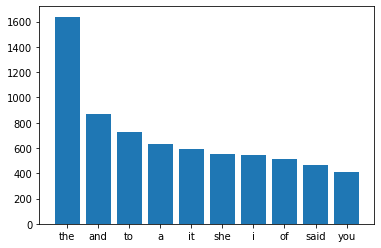

In [83]:
import matplotlib.pyplot as plt

def top_10_bar_chart(lst):
    word_freqs = dict(lst[:10])
    plt.bar(word_freqs.keys(), word_freqs.values())

top_10_bar_chart(sort_by_freq())

### 37. Top-ten words co-occurring with 'Alice'
Extract the list of words that co-occur with the word "Alice". Visualize with a chart (e.g., bar chart) the top-ten words co-occurring with the word "Alice" and their frequencies.

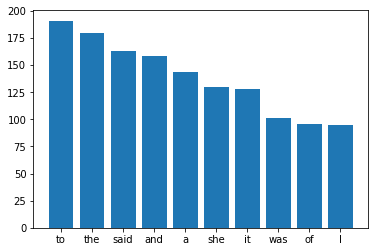

In [84]:
def cooccuring_words():
    lst = []
    for sent in read_text():
        contains_alice = False
        for token in sent:
            if token['text'] == 'Alice':
                contains_alice = True
        if contains_alice:
            token_texts = [token['text'] for token in sent]
            token_set = set(token_texts) - set(['Alice']) - set(string.punctuation)
            lst += list(token_set)

    return Counter(lst).most_common()[:10]

top_10_bar_chart(cooccuring_words())

### 38. Histogram
Draw a histogram of word frequency (x-axis is a scalar range representing a frequency ranging from 1 to the largest frequency of a given word in the entire corpus, and the y-axis is the count of unique words that fall into the count of the x value).

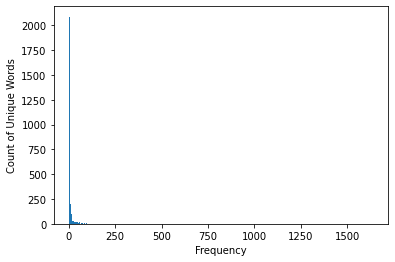

In [85]:
def draw_hist():
    plt.xlabel('Frequency')
    plt.ylabel('Count of Unique Words')
    freqs = [word_freq[1] for word_freq in sort_by_freq()]
    plt.hist(freqs, bins=300)
    # plt.hist(freqs, bins=30, range=(1, 30))

draw_hist()
# Most words occur only a few times

### 39. Zipf's law
Plot a log-log graph with the x-axis being rank order and the y-axis being frequency.

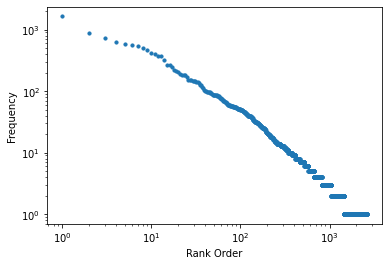

In [86]:
def draw_log_plot():
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Rank Order')
    plt.ylabel('Frequency')
    rank_orders = range(1, len(sort_by_freq()) + 1)
    freqs = [word_freq[1] for word_freq in sort_by_freq()]
    plt.scatter(rank_orders, freqs, s=10)

draw_log_plot()